# Computational Social Science Project #3 

**Enter your Name:**____________

*Semester:* Fall 2023

## 1. Introduction

### Load data 

In [1]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [2]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [3]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
len(chicago_inspections_2011_to_2013)

17677

In [6]:
print("shape of dataframe", chicago_inspections_2011_to_2013.shape)

shape of dataframe (17677, 75)


In [7]:
print("shape of dataframe", chicago_inspections_2014.shape)

shape of dataframe (4623, 73)


In [77]:
columns_to_drop = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag']

In [81]:

try:
    chicago_inspections_2011_to_2013.drop(columns=columns_to_drop, inplace=True)
except KeyError as e:
    print(f"Columns to drop not found in DataFrame: {e}")


Columns to drop not found in DataFrame: "['AKA_Name', 'License', 'Address', 'City', 'State', 'Zip', 'Latitude', 'Longitude', 'Location', 'ID', 'LICENSE_ID', 'LICENSE_TERM_START_DATE', 'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'LICENSE_CODE', 'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER', 'LATITUDE', 'LONGITUDE', 'pass_flag', 'fail_flag'] not found in axis"


In [ ]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [9]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

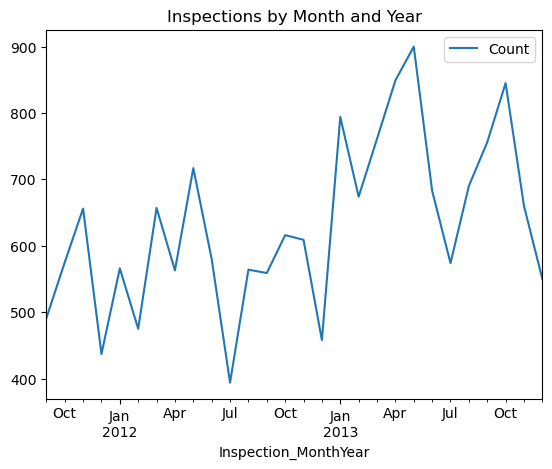

In [10]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

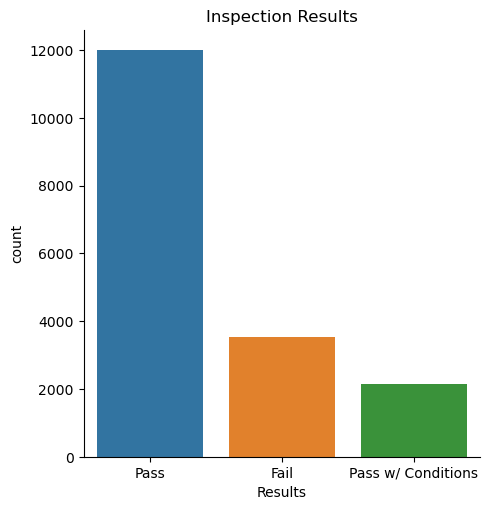

In [11]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

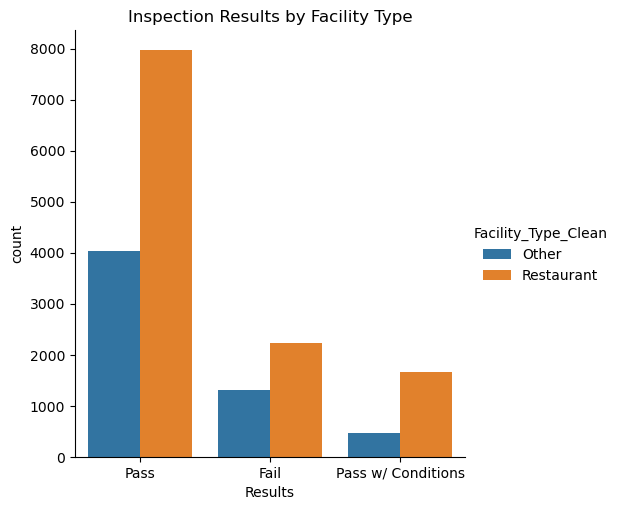

In [12]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [13]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [14]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])

# get dummies
X = pd.get_dummies(X)

In [83]:
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                                                            'Facility_Type', 
                                                                                            'LICENSE_DESCRIPTION', 
                                                                                            'WARD_PRECINCT'])

In [90]:
data_type1 = chicago_inspections_2011_to_2013['Risk'].dtype
print(data_type1)

object


In [ ]:
X = pd.get_dummies(X, columns=['Risk'])

In [98]:
X = pd.get_dummies(X, drop_first=True)

In [99]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,False,True


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

### Model 1: Logit Regression

Logistic regression is a statisical model used to estiamte classfication binary outcomes. We are tgus modeling the probaility of of an outcome as function of a number of predictors.The relationship between the predictors and the log-odds of the outcome is assumed to be linear. This means that the log-odds of the outcome variable are a linear combination of the predictor variables. Similar to linear regression, logistic regression assumes that errors or residuals are independent of each other. This is often assumed through the independence of observations. In logistic regression, the loss function is the logistic loss (or log loss or cross-entropy loss). This loss function penalizes the model more heavily for confident incorrect predictions. However this model can be not as effective on imbalanced models.  This model could be useful as it is the stadard for investigating binary outcomes and can serve as a baseline estimation. Additionally why other more complex classification models can be used sometimes the more elegant or simple model can perform the best. 


In [85]:
# load libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [86]:
np.random.seed(10)

In [101]:
X_train, X_validate, y_train, y_validate = train_test_split(X, 
                                                            y, 
                                                            train_size = .75, 
                                                            test_size=0.25,
                                                            stratify=y)

In [102]:
# create a model
# We must create an isntance like the lb thingy binazer earlier in this session.
logit_reg = LogisticRegression()

# fit the model
#We take the logit__reg then connecting to fit loogit model.
# When we made y it created an array and followed through since we started so now must undo
# we do this by using the TRAVEL piece you see below. Ravel refers to the process of 
# flattening a multi-dimensional array into a one-dimensional array.
# The larger idea is asking "Am I feeding it objects the parameter does not expect?"
logit_model = logit_reg.fit(X_train, y_train.ravel())


# predict on the validation data
y_pred = logit_model.predict(X_validate)

In [103]:
# extract the coefficents and create a dataframe for plotting 
# May wanna look at the coefficents with largets absolute value. So we create a seperate
# variable to look at absolute value. THIS PRIOTIZES THE largest coefficents. 
logit_data = pd.concat([pd.DataFrame(X.columns),
                        pd.DataFrame(np.transpose(logit_model.coef_))],
                       axis = 1)

logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])

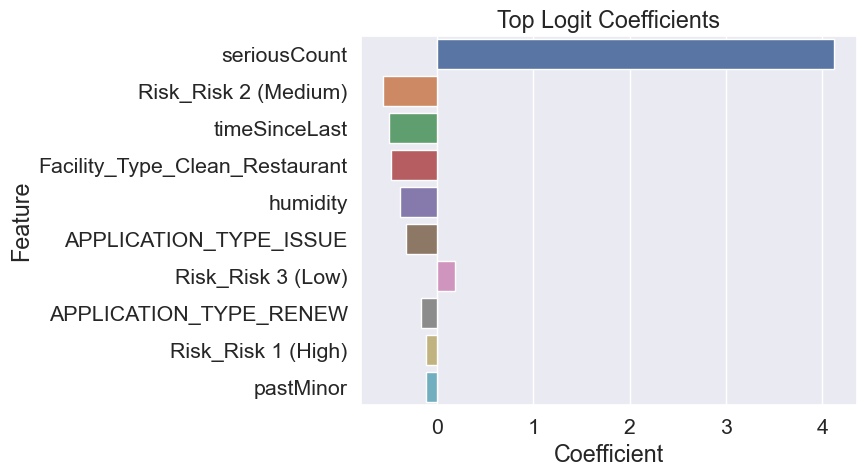

In [104]:
# plot 
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

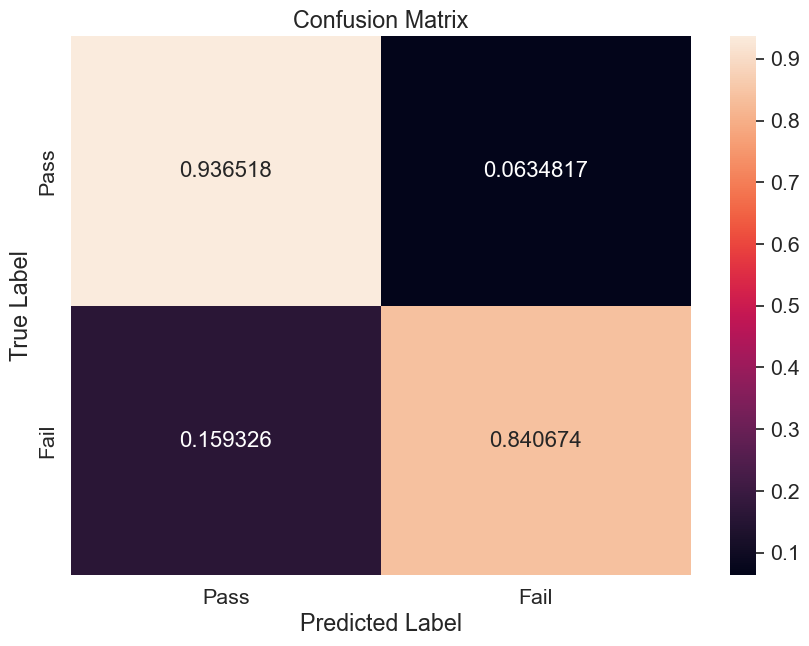

In [105]:
# create a confusion matrix
cf_matrix = confusion_matrix(y_validate, 
                             y_pred, 
                             normalize = "true")

# convert to a dataframe
df_cm = pd.DataFrame(cf_matrix, range(2), range(2))

# set figure specifications
df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

# plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [106]:
# Cross validating  
# hyperparameter tuning
# ----------

# import libraries
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score

# set parameters. This is parameter for logistic regression model we will test.
# We can test different ones 
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.1, 1, .1),
             'fit_intercept': [True, False],
             'solver': ['liblinear', 'saga']}


# execute the grid search and fit to training data
logit_grid = GridSearchCV(logit_model, 
                          param_grid, 
                          cv=5)
logit_grid.fit(X_train, 
               y_train)

# choose best performing model
best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

# print results
#These are parameters for the best model
print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

{'C': 0.1, 'fit_intercept': True, 'penalty': 'elasticnet', 'solver': 'liblinear'}
Validation Accuracy 0.9245036572622779


In [107]:
# set each object to 0 to start
TP = 0
FP = 0
TN = 0
FN = 0

# loop over each observation to assign to TP, FP, TN, and FN
for i in range(len(y_pred)): 
    if y_validate[i]==y_pred[i]==1:
        TP += 1
    if y_pred[i]==1 and y_validate[i]==0:
        FP += 1
    if y_validate[i]==y_pred[i]==0:
        TN += 1
    if y_pred[i]==0 and y_pred[i]!=y_validate[i]:
        FN += 1

In [108]:
# calculate accuracy based on the formula defined above
accuracy = (TP + TN)/(TP + TN + FP + FN)
print("Accuracy is", accuracy)

Accuracy is 0.917189132706374


In [109]:
precision = TP/(TP + FP)
print("Precision is", precision)

Precision is 0.7698695136417556


In [110]:
# calculate recall based on the formula defined above
recall = TP/(TP + FN)
print("Recall is", recall)

Recall is 0.8406735751295337


In [111]:
# calculate the F1 score based on the formula defined above
f1 = 2 * (precision * recall)/(precision + recall)
print("F1 Score is", f1)

F1 Score is 0.8037151702786377


###  Model 2: Random Forrest


Random forrest is a decsion tree method for classification where each split in a node in a tree is a random boostrap sample with m set of predictors. Instead of one tree random forrest produces several trees simultaneously. At each splits in the node features are randomly predicted  to use for each split. Then with each interation of a tree the estimations and variability is averaged. This model can help manage some variability through averaging and can decorrelate predictors that have strong associations among one another. However some limtiations can be that each tree will tend to have one or two strong predictors at the top in turn creating strong similarity between the trees which limits how much variablilty can be manged. Furthermore there can be some threat to over fitting and the results can be not as accesible for interpetation given the structure of preditions. However this can be an effective model for this issue given that we able to many suboptimal estiamtors to average one excellent estimation. Taking these slow learners can often result in a better performance than one single estimator used. 

In [112]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

%matplotlib inline
#sns.set_style("darkgrid")

In [113]:
# initialize a random forest classifier
#We use a subset of features and models to do this and wll take majority vote to 
#determine the winner. Bagging is boot strap aggrgation.

#Boosting on the other hand does not build parrel this runs sequentially
# bassed on the resiudal. 
# ----------
rf_classifier = RandomForestClassifier(
                       # specify parameters
                       n_estimators=100,              # specify the number of trees (100 is default)
                       criterion='gini',              # or you can use 'entropy' for information gain
                       max_depth=5,                # how deep tree nodes can go
                       min_samples_split=2,           # samples needed to split node
                       min_samples_leaf=1,            # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,             # number of features to look for when splitting
                       max_leaf_nodes=None,           # max nodes
                       min_impurity_decrease=1e-07,   # early stopping
                       random_state = 10)             # random seed

In [114]:
# specify cross-validation
# The cross valdiation process is done 5 times as seen by cv below.
# This suggest some cimputational units. 
# ----------
scoresRF = cross_val_score(rf_classifier, 
                         X, 
                         y.ravel(), # Some algorithms will expect you to ravel the target
                         cv=5)

In [115]:
scoresRF

array([0.92556317, 0.92161986, 0.91606793, 0.93207054, 0.93174396])

In [116]:
# calculate the average score across models
# This is higher due to the wisdom of the crowds idea done many times.
# ----------
scoresRF.mean()

0.9254130918893952

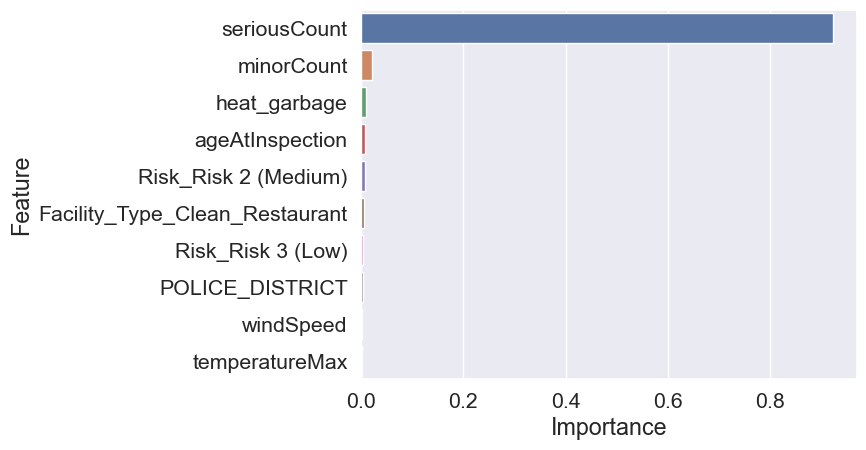

In [117]:
# fit the random forest on data to get feature importance
# ----------
rf_classifier.fit(X, y.ravel())

# import library
import seaborn as sns

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
# This helps us see we do not need many of thesse features. 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()

In [118]:
# define the scoring metrics
scoring = {
          'accuracy': make_scorer(accuracy_score),
          'recall': make_scorer(recall_score),
          'precision': make_scorer(precision_score),
          'f1': make_scorer(f1_score)
          }



# specify cross-validation
# The cross valdiation process is done 5 times as seen by cv below.
# This suggest some cimputational units. 
# ----------
cv_results = cross_validate(rf_classifier, 
                         X, 
                         y.ravel(), # Some algorithms will expect you to ravel the target
                         cv=5,
                         return_estimator=True, # return the estimators fitted at each split
                         scoring=scoring)

# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scoresRF = cv_results[metric]
    print(f"{metric[5:]}: {scoresRF.mean():.3f}")

accuracy: 0.925
recall: 0.926
precision: 0.759
f1: 0.833


In [119]:
# check the samples after root node
# ----------
X['seriousCount'].value_counts()

seriousCount
0    11296
1     2828
2      950
3      199
4       36
5        2
Name: count, dtype: int64

In [36]:


# ----------
scores = cross_val_score(rf_classifier, 
                         X, 
                         y.ravel(),
                         cv=5)

# find the mean score across models
scores.mean()

0.9221476150843179

### Model 3: XGboost

XGBoost slowly constructs (or learns) a more robust model by sequentially integrating weak learning decision trees. This iterative approach allows for the correction of previous model errors in subsequent models, emphasizing the instances where earlier predictions had greater error. It also provides a comprehensive appraoch to estiamtion by using various benifets found in random forrest as well as other boosting methods. For example XGBoost also provideds regularization that prevents model overfitting and shrinks the learning rate so to prevent overfitting overall my limiting how much one tree can contrbute to the overal model thereby minimizing outlier trees while helping generablizability. The model is also highly flexible by allowing a wide range of hyper paramters such as specfying a unique objective functuion or the depth of the tree.  However the model can be difficult to explain given the complexity.This model still may be a ideal choice for the our issue given the large dataset we are working with across several years. Furthermore this model is known to out perform a random forrest base model so we may be able to provide a greater performance than the previous model. 

In [25]:
import xgboost as xgb

In [120]:
# initialize an XGBoost classifier
# ----------
xgb_classifier = xgb.XGBClassifier(random_state=10)


# define the scoring metrics
# This chunck adapted to loojk at more than one metric of scoring
scoring = {
          'accuracy': make_scorer(accuracy_score),
          'recall': make_scorer(recall_score),
          'precision': make_scorer(precision_score),
          'f1': make_scorer(f1_score)
          }


# perform cross-validation with 5-fold and return the trained estimators
cv_results_xgb = cross_validate(xgb_classifier,        # specify estimator 
                            X,                     # specify features
                            y.ravel(),             # specify outcome, and use ravel
                            cv=5,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return (the whole list in this case). Can be specific.
 
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores_xgb = cv_results_xgb[metric]
    print(f"{metric[5:]}: {scores_xgb.mean():.3f}")

accuracy: 0.918
recall: 0.835
precision: 0.777
f1: 0.805


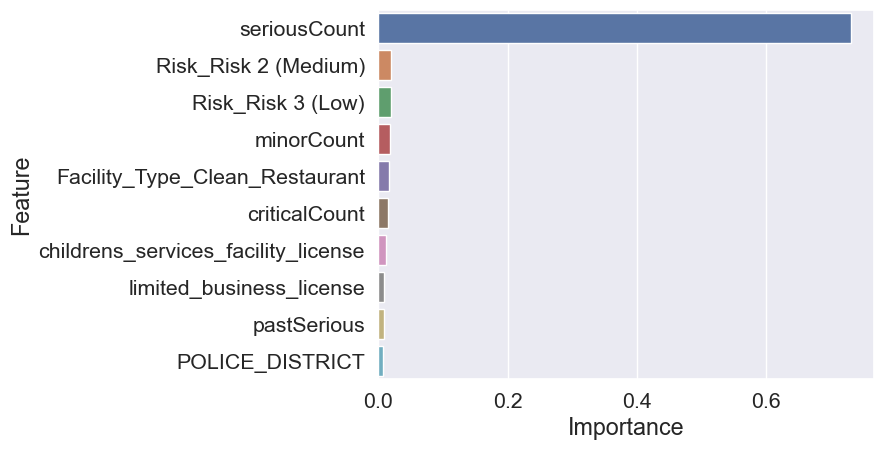

In [121]:
# fit the random forest on data to get feature importance
# ----------
xgb_classifier.fit(X, y.ravel())

# import library
import seaborn as sns

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(xgb_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
# This helps us see we do not need many of thesse features. 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()

### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

## Please see model section for performance metrics.

We may care most about precision and recall in our context. First given that we have limited resources to investigate businesses we would want to ensure the organizations identified as cases that would fail inspection truly are failed cases. If not we will substantially waste resources and bring little public health benifet. Secondly given that our sample have very unbalanced data we may be missing the full universe of caes that would fail which we could hekp resolve by priotizing recall. Furthermore recall will allow cases that should be flagged as failed can be indentified as it can have a public health risk to the public not merelt about the investigation efficency. 

Due to our performanc metric priorities it may be bessed to use a simple ligistic regression. Althugh all scores have high accuracy the logsitc regression has nearly identical rates of precision and recall compared to XGBoost all while being a far more simple model. 

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

For all models serious count was by far the most predictive x variable in our model although there changes in the magniture across our models. All other predictors in our random forrest and XGBoost model were pushed to nearly to zero. However in our logsitic model while other predictors were small in effect size some varaibles including  risk 2 medium ratings and the time since the last insepection were in opposite directions. If avaialble it would be useful to know rent rates of of restaraunts and the average income within the district or census tracts. Previous research has shown that goverment inspections of private households often occur more frequently in lower income areas and there may be reason to suggest that food inspections tend to follow similar patterns. Also we may be able to have a better insights on the constraints restaraunts have in maintainng certain quality assurances which may helps us develop a more nuanced perspective or policy intervention to how inspections are conducted. 

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [122]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------

best_logit_pred = logit_grid.best_estimator_.predict(X_validate)
predicted_probabilities = logit_grid.best_estimator_.predict_proba(X_validate)

for i in range(5):  
    print(f"Instance {i + 1}:")
    print(f"Predicted Label: {best_logit_pred[i]}")
    print(f"Predicted Probabilities: {predicted_probabilities[i]}")
    print("=" * 20)


Instance 1:
Predicted Label: 0
Predicted Probabilities: [0.97480381 0.02519619]
Instance 2:
Predicted Label: 0
Predicted Probabilities: [0.98461807 0.01538193]
Instance 3:
Predicted Label: 0
Predicted Probabilities: [0.97755634 0.02244366]
Instance 4:
Predicted Label: 0
Predicted Probabilities: [0.9805328 0.0194672]
Instance 5:
Predicted Label: 0
Predicted Probabilities: [0.96716449 0.03283551]


In [123]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------

import numpy as np
import pandas as pd  

# Resetting index for X_validate
X_validate_reset_index = X_validate.reset_index(drop=True)

# Assuming 'predicted_probabilities' contains the predicted probabilities for the 'Fail' class (class 1)
fail_probs = predicted_probabilities[:, 1]  # Extract probabilities for class 1

# Sorting indices based on probabilities in descending order
sorted_indices = np.argsort(fail_probs)[::-1]

# Reordering the original validation set data and predictions based on sorted probabilities
ordered_X_validate = X_validate_reset_index.loc[sorted_indices]
ordered_predictions = best_logit_pred[sorted_indices]
ordered_fail_probs = fail_probs[sorted_indices]

# Printing the ordered audits by their probability of detecting a "Fail" score for the first few instances
for i in range(5):  # Print for the first 5 instances
    print(f"Instance {i + 1}:")
    print(f"Predicted Label: {ordered_predictions[i]}")
    print(f"Probability of 'Fail': {ordered_fail_probs[i]}")
    print("=" * 20)



Instance 1:
Predicted Label: 1
Probability of 'Fail': 0.9999986203011375
Instance 2:
Predicted Label: 1
Probability of 'Fail': 0.9999984979353311
Instance 3:
Predicted Label: 1
Probability of 'Fail': 0.9999983605213307
Instance 4:
Predicted Label: 1
Probability of 'Fail': 0.999998306788609
Instance 5:
Predicted Label: 1
Probability of 'Fail': 0.999997820765214


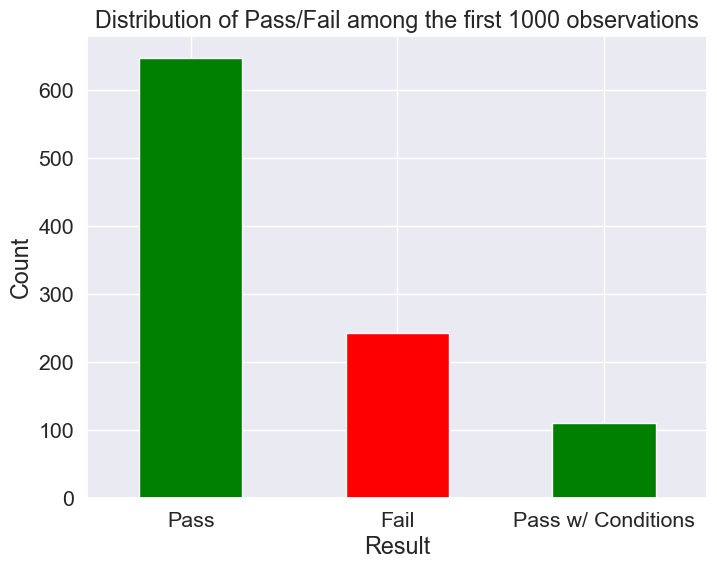

In [124]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------

first_1000_observations = chicago_inspections_2011_to_2013.head(1000)

# Plotting the distribution of 'Pass' and 'Fail' among the first 1000 observations
plt.figure(figsize=(8, 6))
first_1000_observations['Results'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Pass/Fail among the first 1000 observations')
plt.xlabel('Result')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Ensure x-labels are not rotated
plt.show()


In [125]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------

# Simulate random audits by selecting 1,000 observations at random
random_audits = chicago_inspections_2011_to_2013.sample(n=1000, random_state=42)  # Adjust random_state for reproducibility

# Display a sample of the randomly selected audits
print(random_audits.head())


                                         Facility_Type           Risk  \
Inspection_ID DBA_Name                                                  
1277334       Aquarius Club & Restaurant    Restaurant  Risk 1 (High)   
670538        SUBWAY 3634                   Restaurant  Risk 1 (High)   
598531        MANGIA FRESCA INC.,           Restaurant  Risk 1 (High)   
1184324       PADDY O FEGAN'S               Restaurant  Risk 1 (High)   
1376178       YOLK CAFE                     Restaurant  Risk 1 (High)   

                                         Inspection_Type             Results  \
Inspection_ID DBA_Name                                                         
1277334       Aquarius Club & Restaurant         Canvass                Pass   
670538        SUBWAY 3634                        Canvass                Fail   
598531        MANGIA FRESCA INC.,                Canvass                Pass   
1184324       PADDY O FEGAN'S                    Canvass                Pass   
1376178 

### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [136]:
chicago_inspections_2014copy = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [137]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2014copy.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE', 
                                                 'Facility_Type', 
                                                 'LICENSE_DESCRIPTION', 
                                                 'WARD_PRECINCT'],
                                     inplace = True)

# set index
chicago_inspections_2014copy.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [138]:
chicago_inspections_2014copy['Inspection_Date'] = pd.to_datetime(chicago_inspections_2014copy['Inspection_Date'])  

In [139]:
# drop datetime info
# -----------
chicago_inspections_2014copy = chicago_inspections_2014copy.dropna().drop(['minDate',
                                                                                   'maxDate'],
                                                                                  axis = 1)

In [145]:
# data processing
# -----------

# process target for 2014 data
y_test2014 = chicago_inspections_2014copy['Results']

# comment out the following lines of code if you don't want to binarize the target variable
y_test2014 = pd.Series(y_test2014).replace({'Pass w/ Conditions': 'Pass'}).values
lb_style = LabelBinarizer()
y_test2014 = lb_style.fit_transform(y_test2014)

# recode 0s and 1s so 1s are "Fail"
y_test2014 = np.where(y_test2014 == 1, 0, 1)

# process features for 2014 data
X_test2014 = chicago_inspections_2014copy.drop(columns=['Results'])

# get dummies for X_test2014
X_test2014 = pd.get_dummies(X_test2014)

In [161]:
X_test2014

,,Inspection_Date,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
920445,SUBWAY,2014-02-03,2,0,0,0,0,0,0,0.794521,0,4.0,1.432877,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.160000,6.020000,0.746667,12.034833,7.194320,1.219222,1,True,False,False,True,False,True,False,False,True,False
920446,SHARKS FISH & CHICKEN,2014-02-03,0,0,6,0,0,0,2,0.660274,0,4.0,9.931507,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.160000,6.020000,0.746667,26.292725,27.837325,12.401466,0,False,True,False,True,False,True,False,False,False,True
920448,P K PETRO INC.,2014-03-07,0,1,7,0,0,0,0,2.000000,1,3.0,11.013699,0,1,0,0,0,0,0,0,0,1,0,0,0.000433,25.300000,7.653333,0.636667,49.468944,11.282325,66.467028,0,False,False,True,True,True,False,False,False,False,True
920449,"Z T DOLLAR EXCHANGE,INC",2014-03-07,1,2,5,0,0,0,0,2.000000,1,3.0,1.408219,0,1,0,0,0,1,0,0,0,0,0,0,0.000433,25.300000,7.653333,0.636667,69.939833,26.695701,76.827119,1,False,False,True,True,True,False,False,False,True,False
920450,KENNEDY FISH & CHICKEN,2014-03-07,0,1,7,0,0,0,3,0.964384,0,3.0,3.304110,0,0,0,0,0,0,0,0,0,0,0,0,0.000433,25.300000,7.653333,0.636667,69.662066,27.638311,78.175677,0,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506243,CENTRAL GYROS CORP,2014-10-29,0,0,6,0,0,0,7,0.715068,0,25.0,12.463014,1,0,0,0,0,0,0,0,0,0,0,0,0.001800,65.673333,8.430000,0.646667,19.974219,26.320516,33.413499,0,True,False,False,True,False,True,False,False,False,True
1506245,TORTILLA SOUP,2014-10-30,0,0,4,0,0,0,7,0.580822,0,16.0,11.961644,1,0,0,0,0,0,0,0,0,0,0,0,0.001733,62.490000,11.026667,0.680000,14.219000,23.563573,12.189961,0,True,False,False,True,False,True,False,False,False,True
1506247,GROTA RESTAURANT,2014-10-31,0,0,4,0,0,0,8,0.465753,0,25.0,12.468493,1,0,0,0,0,0,0,0,0,0,0,0,0.001067,54.763333,9.256667,0.703333,21.580979,27.637291,27.170901,0,True,False,False,True,False,True,False,False,False,True


In [162]:
columns_to_drop_test = ['APPLICATION_TYPE_C_EXPA', 'Facility_Type_Clean_Other', 'Inspection_Date', 'Inspection_Type_Canvass']
X_test2014 = X_test2014.drop(columns=columns_to_drop_test)

In [163]:
# Assuming you've trained the best estimator already
# Making predictions using the best estimator on the 2014 data
predictions2014 = logit_grid.best_estimator_.predict(X_test2014)




In [165]:
#Calculate performance scores.
accuracy_score(y_test2014, predictions2014)

0.9040121889283901

In [166]:
precision_score(y_test2014, predictions2014)

0.7410926365795725

In [167]:
recall_score(y_test2014, predictions2014)

0.7959183673469388

In [168]:
f1_score(y_test2014, predictions2014)

0.7675276752767528

In [ ]:
# predict and compare 
# -----------


In [ ]:
# evaluate
# -----------


In [148]:
X_test2014.shape

(3938, 42)

In [156]:
X_validate.shape

(3828, 38)

Unfortuantely our model performed worse for recal and precision on our test data than any of our other models used in the traiing and validation process. Still our one of metrics priorties, the recall, did not have the worse performance of all metrics unlike performance on precision. While. F1 scores are a ration of these two metrics I believe that there is a greater benifet in directly observing the precision and recall values to understand these performances in of themselves while the F1 score can obscure how each is performing. 

## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


Only having accuracy as a performance metric will severly limit the kinds patterns we are able to identify about the phenomenon we are invsitgating. This can be of particualr importance to us as social scientist where we are studying populations whose expereince is more likely to be captured or be imoapcted more by an alternative performance metric. Also by using other performance metrics we can also get some insight on the proprotion of the universe that we do not know about or the degree of noise of what we think we know. As it relates to public policy we will be able to have more nuanced insights on policy impacts and implimenation to help fine tune policy to deal with potential trade offs and restrictions in capacity. 

**YOUR ANSWER HERE**...

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

**YOUR ANSWER HERE**...

First becuase our model was a simple logistic model we have a great degree of leeway to pivot to new models. For example while we have some hyper tuning in our XGBoost model if there were time to understand the phenomemn and optimize key hyper paremeters relative to the data we would be able to make better predictions that are generally difficult to interpert therby limiting the likeliehood the new method employed could be "gamed". Furthermore there could be ongoing clustering estiamtions of recall in specific restaraunts or areas as it could be the case that these subjects with higher recall are the same areas more likely to game the system. Lastly the goverment could also simple randomize  ispections for a signficant portion of investigations so that that the system of inspections could not be fully gamed and use a another subset to that has targeted inspections that adjust by feeding the model ongoing randomized data. 